# Some Useful Hints

## Plot Bloch vector

A standard way to plot a quantum system is with the Bloch vector in the Bloch sphere. This only works for a single qubit and takes as input the Bloch vector.

The Bloch vector is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the density matrix.


In [2]:
from qiskit.visualization import plot_bloch_vector

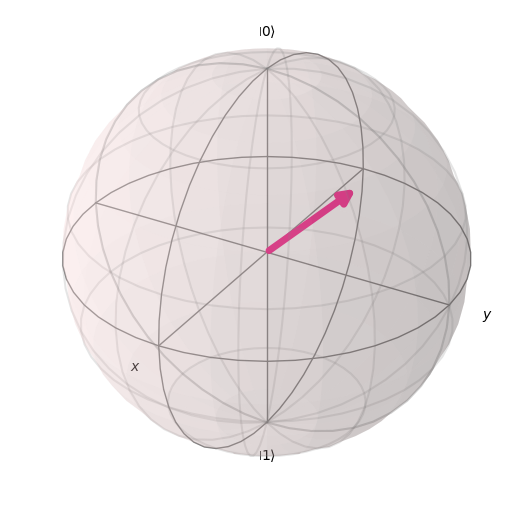

In [8]:
plot_bloch_vector([0,0.5,0.5])

### Quantum Gate Playground

A nice tool to visualize Quantum computation: [Quantum Gate Playground
](https://davidbkemp.github.io/quantum-gate-playground/)

# Deutsch's Algorithm

You are given an unknown balanced $f$ which is either constant or balanced. Determine if the function is constant or balanced. 


<img src="Image/img_1.png" width=600 />


The measure is $1$ with a probability of 1.0 if the function is balanced and  is $0$ with a probability of 1.0 if the function is constant. 

Let's consider the case in wich $n = 1$


### Constant Function

Consider the constant function $f(0)=1, f(1)=1$, whose circuit $U_{f}(x,y) = (x, y \oplus 1)$ is implemented as:


<img src="Image/img.png" width=250 />



#### Your Turn
Try to implement the algorith 


In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram


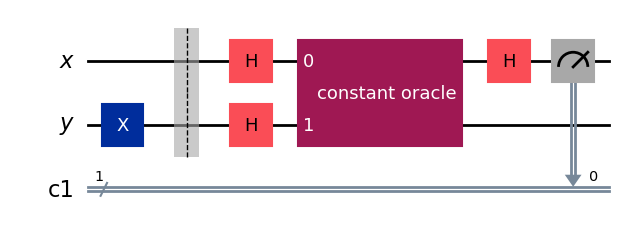

In [29]:
def constant_oracle():
    oracle = QuantumCircuit(2, name = 'constant oracle')
    oracle.x(1)
    
    return oracle


x = QuantumRegister(1, name='x')
y = QuantumRegister(1, name='y')
circ_const = QuantumCircuit(x,y,ClassicalRegister(1))
circ_const.x(1)
circ_const.barrier()
circ_const.h(0)
circ_const.h(1)
circ_const.append(constant_oracle(),[0,1])
circ_const.h(0)
circ_const.measure(0,0)
# circ_const.decompose().draw('mpl')
circ_const.draw('mpl')
    

In [30]:
sampler = Sampler()
job = sampler.run(circ_const) # , shots=2048)
job.result()


SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{}])

### Balance Function

Consider the function $f(0)=0, f(1)=1$, whose circuit is $U_{f}(x,y) = (x, y \oplus x)$.

1. How do you implement this oracle?

Let's consider the CNOT gate, represented in circuit:

<img src="Image/img.png" width=250 />

The circuit behaviour is described by the following input/output relations:

$$|00> \rightarrow |00>$$

$$|01> \rightarrow |01>$$

$$|10> \rightarrow |11>$$

$$|11> \rightarrow |10>$$

We can see that the gates correspond exactly to $U_{f}(x,y) = (x, y \oplus x)$.

Now we can implement the algorithm.


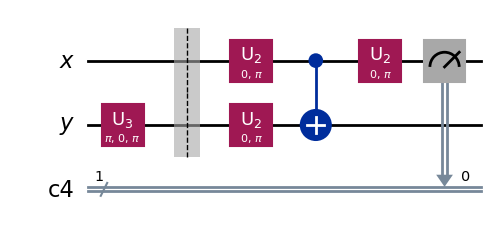

In [33]:
def balance_oracle():
    oracle = QuantumCircuit(2, name='balance oracle')
    oracle.cx(0,1)
    
    return oracle

x = QuantumRegister(1, name='x')
y = QuantumRegister(1, name='y')
circ_bal = QuantumCircuit(x,y,ClassicalRegister(1))
circ_bal.x(1)
circ_bal.barrier()
circ_bal.h(0)
circ_bal.h(1)
circ_bal.append(balance_oracle(),[0,1])
circ_bal.h(0)
circ_bal.measure(0,0)
circ_bal.decompose().draw('mpl')
# circ_bal.draw('mpl')
    

In [35]:
job = sampler.run(circ_bal) # , shots=2048)
job.result()

SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{}])

2. Try to implement also the oracle for $f(0)=1, f(1)=0$

Now we want a circuit that gives $(1,y) \rightarrow (1, y \oplus 0) = (1, y)$ and $(0,y) \rightarrow (0, y \oplus 1) = (0, !y)$, i.e a circuit that negates $y$ if $x$ is zero.
We need a not-control not, usually represented as:

<img src="Image/img_3.png" width=250 />

We can implement this gae with the following circuit:

<img src="Image/img_4.png" width=250 />

We can verify that the circuit is correct:

$$|00> \xrightarrow{X} |10> \xrightarrow{CN} |11> \xrightarrow{X} |01>$$

$$|01> \xrightarrow{X} |11> \xrightarrow{CN} |10> \xrightarrow{X} |00>$$

$$|10> \xrightarrow{X} |00> \xrightarrow{CN} |00> \xrightarrow{X} |10>$$

$$|11> \xrightarrow{x} |01> \xrightarrow{CN} |01> \xrightarrow{X} |11>$$

In [20]:
test = QuantumCircuit()

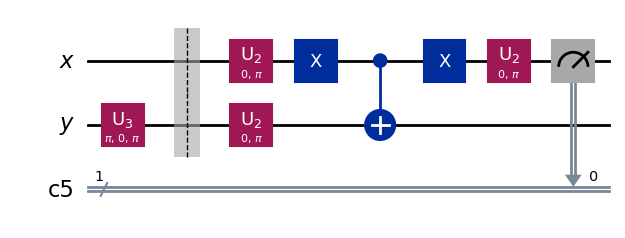

In [36]:
def balance_oracle():
    oracle = QuantumCircuit(2, name='balance oracle')
    oracle.x(0)
    oracle.cx(0,1)
    oracle.x(0)
    
    return oracle

x = QuantumRegister(1, name='x')
y = QuantumRegister(1, name='y')
circ_bal = QuantumCircuit(x,y,ClassicalRegister(1))
circ_bal.x(1)
circ_bal.barrier()
circ_bal.h(0)
circ_bal.h(1)
circ_bal.append(balance_oracle(),[0,1])
circ_bal.h(0)
circ_bal.measure(0,0)
circ_bal.decompose().draw('mpl')
# circ_bal.draw('mpl')
    

In [37]:
job = sampler.run(circ_bal) # , shots=2048)
job.result()

SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{}])